In [166]:
import sklearn.neural_network as nn
import sklearn.model_selection as ms
import sklearn.datasets as ds
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

digits = ds.load_digits()

In [167]:
results = []
alphas = [0.1, 0.3, 1, 3, 5, 10, 15, 20]

for alpha in alphas:
    clf = nn.MLPClassifier(hidden_layer_sizes=(64, 64), alpha=alpha)

    results.append(ms.learning_curve(clf, digits.data, digits.target, n_jobs=4))

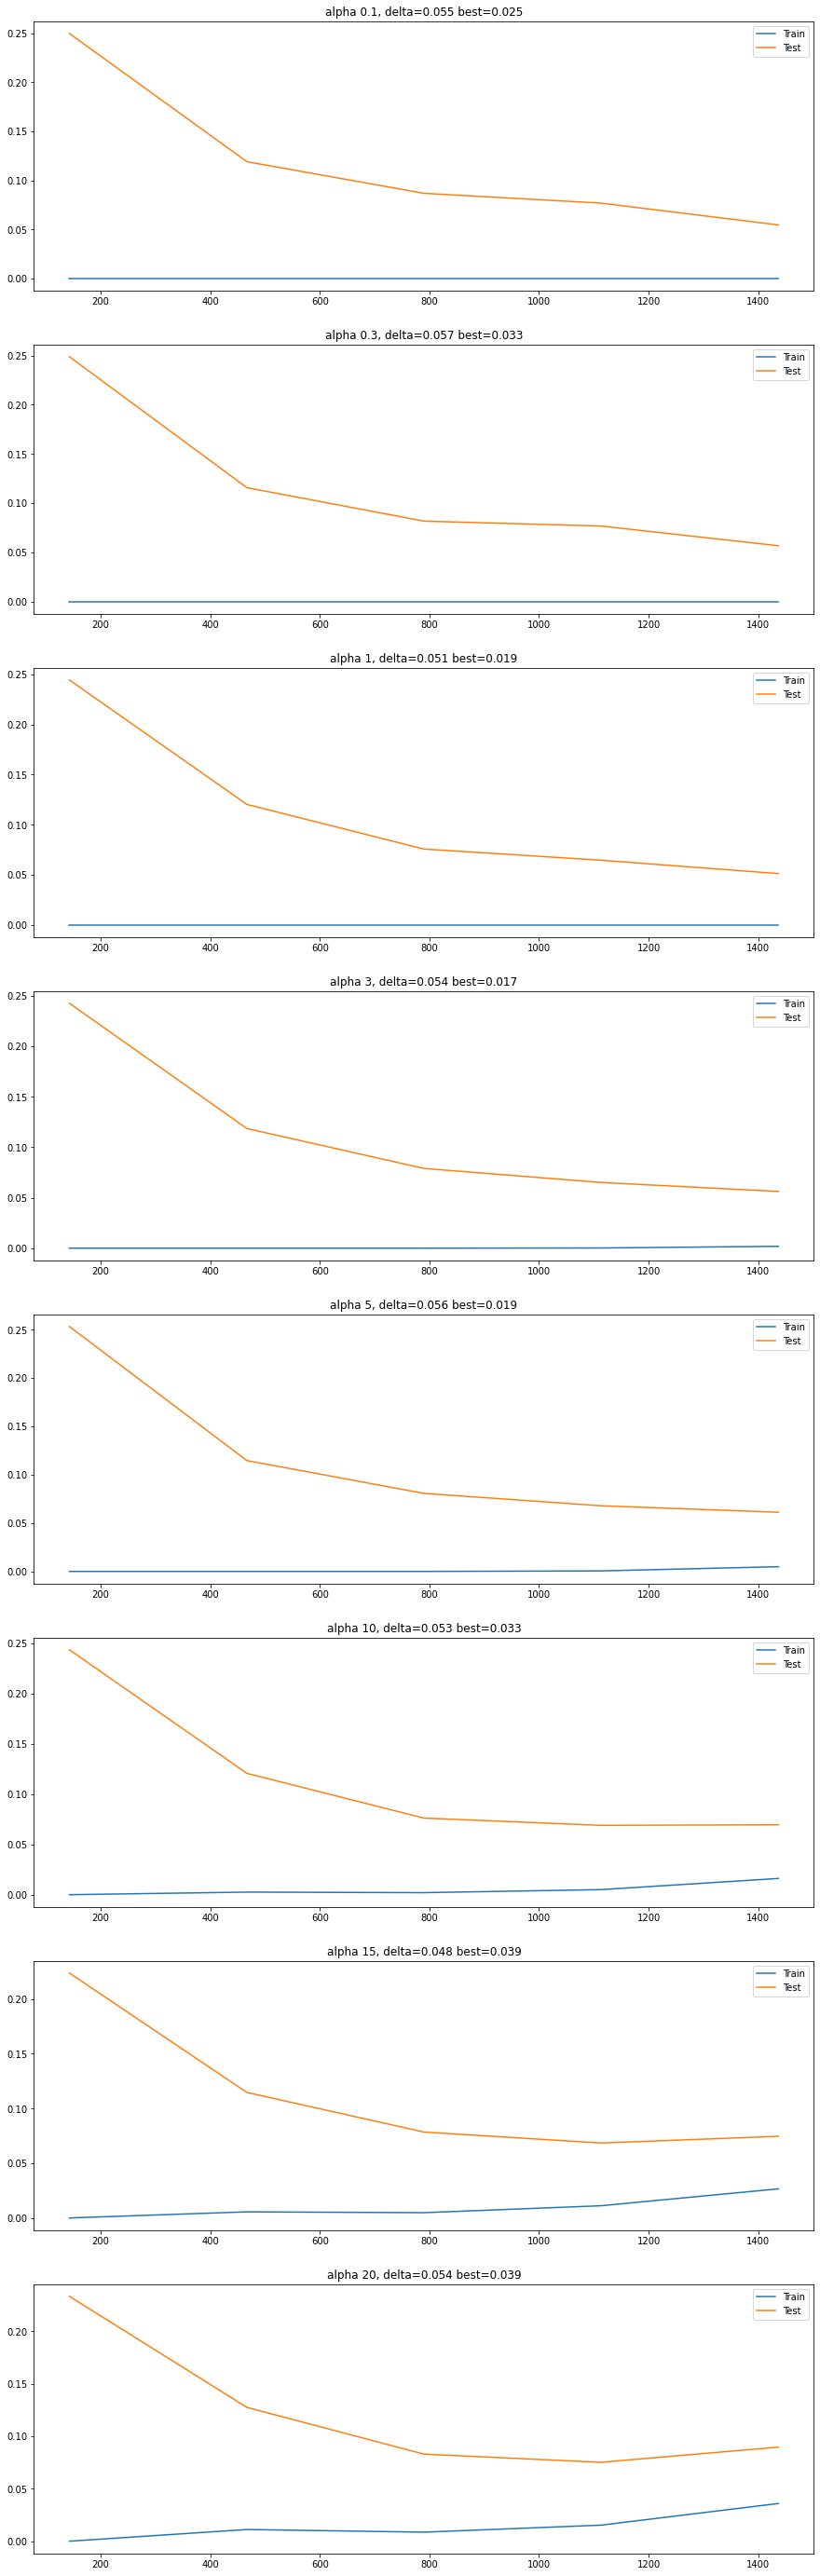

In [170]:
fig, ax = plt.subplots(nrows=len(results), ncols=1, figsize=(15, 50))

for index, _ in enumerate(results):
    train_sizes, train_scores, test_scores = results[index]
    ax[index].plot(train_sizes, np.mean(1 - train_scores, axis=1), label='Train')
    ax[index].plot(train_sizes, np.mean(1 - test_scores, axis=1), label='Test')
    ax[index].set_title(
        f'alpha {alphas[index]}, delta={np.round(np.abs(np.max(np.mean(test_scores - train_scores, axis=1))), 3)} best={np.round(np.min(1 - test_scores), 3)}')
    ax[index].legend()

plt.legend()

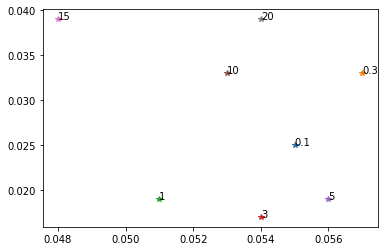

In [176]:
for index, _ in enumerate(results):
    train_sizes, train_scores, test_scores = results[index]
    delta = np.round(np.abs(np.max(np.mean(test_scores - train_scores, axis=1))), 3)
    best = np.round(np.min(1 - test_scores), 3)

    plt.plot(delta, best, '*')
    plt.annotate(alphas[index], (delta, best))

In [ ]:
X_train, X_test, y_train, y_test = ms.train_test_split(digits.data, digits.target, train_size=0.3, random_state=42)

clf = nn.MLPClassifier(hidden_layer_sizes=(64, 64), alpha=1, max_iter=2_000)

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

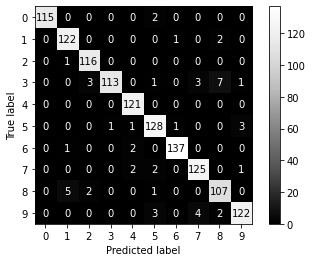

In [63]:
import sklearn.metrics as mt

mt.plot_confusion_matrix(clf, X_test, y_test, cmap='Greys_r')